<font size="5">Датасет з продажу житлової нерухомості:</font>

In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

plt.figure(figsize=(14, 8))
warnings.filterwarnings('ignore')
property = pd.read_csv('raw_sales.csv')

<Figure size 1008x576 with 0 Axes>

In [2]:
def regression_score(y, predict):
    print("RMSE:", metrics.mean_squared_error(y, predict, squared=False))
    print("MSE:", metrics.mean_squared_error(y, predict, squared=True))
    print("R2:", metrics.r2_score(y, predict))
    print("MAPE:", metrics.mean_absolute_error(y, predict))

In [3]:
def gridsearchscore(regression):
    print(f'Best score: {regression.best_score_}, Best alpha: {regression.best_params_}')

In [4]:
def truepredplot(y_true, predicted):
    ax = sns.regplot(y=y_true, x=predicted)
    ax.set(xlabel='predicted values', ylabel='true values')
    plt.show()

In [5]:
property['datesold'] = pd.to_datetime(property['datesold'])
property['month'] = property['datesold'].dt.month
property['year'] = property['datesold'].dt.year
property['propertyType'].replace(['house','unit'],[1, 0],inplace=True)
property.head()

,datesold,postcode,price,propertyType,bedrooms,month,year
0,2007-02-07,2607,525000,1,4,2,2007
1,2007-02-27,2906,290000,1,3,2,2007
2,2007-03-07,2905,328000,1,3,3,2007
3,2007-03-09,2905,380000,1,4,3,2007
4,2007-03-21,2906,310000,1,3,3,2007


In [6]:
property.drop('postcode', axis=1, inplace=True)

In [7]:
property.drop('datesold', axis=1, inplace=True)

<AxesSubplot:>

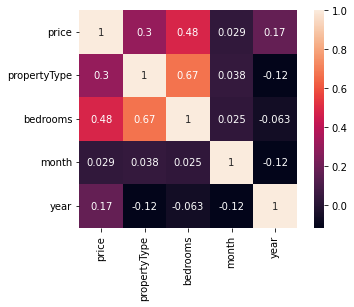

In [8]:
corr = property.corr()

sns.heatmap(corr, square=True, annot=True)

In [9]:
from sklearn.model_selection import train_test_split

y = property['price']
X = property.drop(['price'], axis='columns')

In [10]:
y.head()

0    525000
1    290000
2    328000
3    380000
4    310000
Name: price, dtype: int64

In [11]:
X.head()

,propertyType,bedrooms,month,year
0,1,4,2,2007
1,1,3,2,2007
2,1,3,3,2007
3,1,4,3,2007
4,1,3,3,2007


In [12]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.2,
                     random_state=17)

Почнемо з одношарової моделі 

In [13]:
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(max_iter=100000)

In [14]:
MLP.fit(X_train, y_train)

MLPRegressor(max_iter=100000)

In [15]:
predicted = MLP.predict(X_test)

regression_score(y_test, predicted)

RMSE: 252467.373251921
MSE: 63739774556.72479
R2: 0.23258976104796114
MAPE: 152502.0627933625


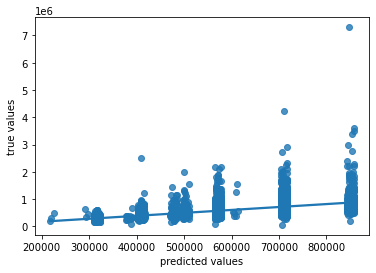

In [16]:
truepredplot(y_test, predicted)

In [17]:
predict = MLP.predict(X_train)

regression_score(y_train, predict)

RMSE: 244746.33137327078
MSE: 59900766720.674866
R2: 0.2362633047707785
MAPE: 149907.88128727415


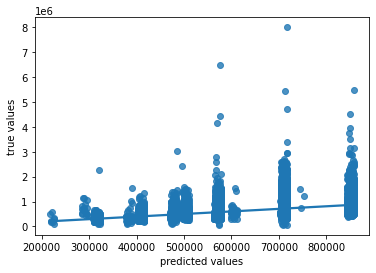

In [18]:
truepredplot(y_train, predict)

Спробуємо знайти значення alpha для кращого результату:

In [19]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [0.1, 1, 2, 5, 10]}

MLP_GS = GridSearchCV(MLP, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [20]:
MLP_GS.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=100000), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 2, 5, 10]},
             scoring='neg_mean_squared_error')

In [21]:
gridsearchscore(MLP_GS)

Best score: -60562653766.4146, Best alpha: {'alpha': 1}


In [22]:
predict = MLP_GS.best_estimator_.predict(X_test)

regression_score(y_test, predict)

RMSE: 252987.08910537182
MSE: 64002467254.00934
R2: 0.229427009579258
MAPE: 152869.7685007788


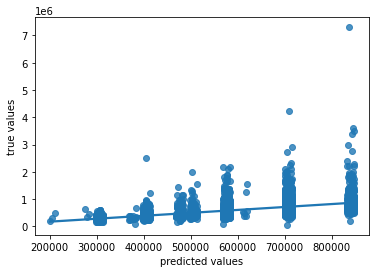

In [23]:
truepredplot(y_test, predict)

In [24]:
predict = MLP_GS.best_estimator_.predict(X_train)

regression_score(y_train, predict)

RMSE: 245251.32700962364
MSE: 60148213399.981346
R2: 0.23310835168010713
MAPE: 150350.27334067287


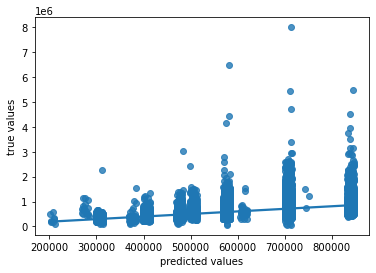

In [25]:
truepredplot(y_train, predict)

Тепер кількість нейронів:

In [26]:
parameters = {'hidden_layer_sizes': [(10, ), (50,), (100, ), (150, )]}

MLP_GS = GridSearchCV(MLP, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [27]:
MLP_GS.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=100000), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(10,), (50,), (100,), (150,)]},
             scoring='neg_mean_squared_error')

In [28]:
gridsearchscore(MLP_GS)

Best score: -59976575978.778465, Best alpha: {'hidden_layer_sizes': (150,)}


In [29]:
predict = MLP_GS.predict(X_test)

regression_score(y_test, predict)

RMSE: 252847.23410432527
MSE: 63931723794.207466
R2: 0.2302787423594318
MAPE: 154020.29941068313


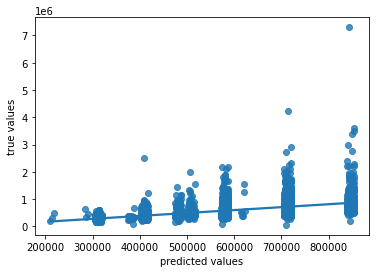

In [30]:
truepredplot(y_test, predict)

In [31]:
predict = MLP_GS.predict(X_train)

regression_score(y_train, predict)

RMSE: 245141.49300059787
MSE: 60094351590.56217
R2: 0.2337950914762218
MAPE: 151472.96828863962


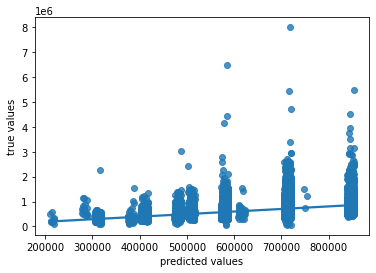

In [32]:
truepredplot(y_train, predict)

Спробуємо знайти значення для alpha та hidden_layer_sizes разом

In [33]:
parameters = {'alpha': [0.01, 0.1, 1, 2, 5], \
            'hidden_layer_sizes': [(50, ), (100, ), (150, )]}


MLP_GS = GridSearchCV(MLP, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [34]:
MLP_GS.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=100000), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 2, 5],
                         'hidden_layer_sizes': [(50,), (100,), (150,)]},
             scoring='neg_mean_squared_error')

In [35]:
gridsearchscore(MLP_GS)

Best score: -60369669829.71358, Best alpha: {'alpha': 1, 'hidden_layer_sizes': (100,)}


In [36]:
predict = MLP_GS.predict(X_test)

regression_score(y_test, predict)

RMSE: 253351.25009904592
MSE: 64186855926.74932
R2: 0.22720701811566235
MAPE: 156271.56952687303


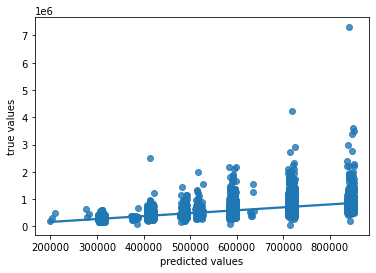

In [37]:
truepredplot(y_test, predict)

In [38]:
predict = MLP_GS.predict(X_train)

regression_score(y_train, predict)

RMSE: 245682.49741657177
MSE: 60359889536.843796
R2: 0.23040947415187651
MAPE: 153758.38975753135


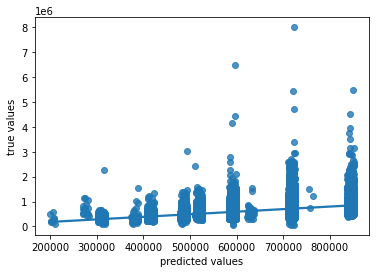

In [39]:
truepredplot(y_train, predict)

Двошарова:


In [40]:
parameters = {'alpha': [0.1, 1, 2, 5], \
              'hidden_layer_sizes': [(100, 50), (50, 100), (100, 100), (50, 50)]}


MLP_GS = GridSearchCV(MLP, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [41]:
MLP_GS.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=100000), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 2, 5],
                         'hidden_layer_sizes': [(100, 50), (50, 100),
                                                (100, 100), (50, 50)]},
             scoring='neg_mean_squared_error')

In [42]:
gridsearchscore(MLP_GS)

Best score: -59647336717.57892, Best alpha: {'alpha': 2, 'hidden_layer_sizes': (100, 50)}


In [43]:
predict = MLP_GS.best_estimator_.predict(X_test)

regression_score(y_test, predict)

RMSE: 251479.49208992047
MSE: 63241934941.80437
R2: 0.23858361999243982
MAPE: 153521.36380732615


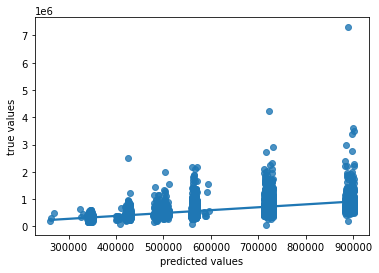

In [44]:
truepredplot(y_test, predict)

In [45]:
predict = MLP_GS.best_estimator_.predict(X_train)

regression_score(y_train, predict)

RMSE: 243922.34657830626
MSE: 59498111160.26735
R2: 0.24139717606920985
MAPE: 150746.2930239523


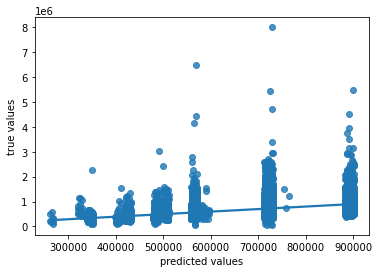

In [46]:
truepredplot(y_train, predict)

Можливо двох шарів недостатньо, спробуємо тришарову:

In [47]:
parameters = {'hidden_layer_sizes': [(100, 50, 10),
                                     (50, 50, 10),
                                     (50, 50, 50),
                                     (100, 100, 50),
                                     (100, 100, 10),
                                     (50, 100, 10),
                                     (100, 50, 100),
                                     (100, 100, 100)]}


MLP_GS = GridSearchCV(MLP, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [48]:
MLP_GS.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=100000), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(100, 50, 10), (50, 50, 10),
                                                (50, 50, 50), (100, 100, 50),
                                                (100, 100, 10), (50, 100, 10),
                                                (100, 50, 100),
                                                (100, 100, 100)]},
             scoring='neg_mean_squared_error')

In [49]:
gridsearchscore(MLP_GS)

Best score: -59662021355.650894, Best alpha: {'hidden_layer_sizes': (100, 100, 10)}


In [50]:
predict = MLP_GS.best_estimator_.predict(X_test)

regression_score(y_test, predict)

RMSE: 251412.33883320526
MSE: 63208164117.582405
R2: 0.23899021189625513
MAPE: 153397.57373344208


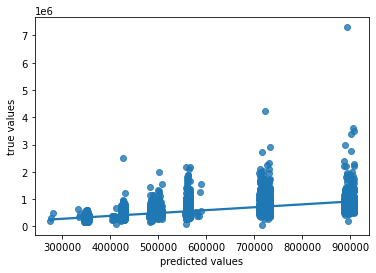

In [51]:
truepredplot(y_test, predict)

In [52]:
predict = MLP_GS.best_estimator_.predict(X_train)

regression_score(y_train, predict)

RMSE: 243868.3566159992
MSE: 59471775358.58816
R2: 0.24173295838455933
MAPE: 150597.21544503068


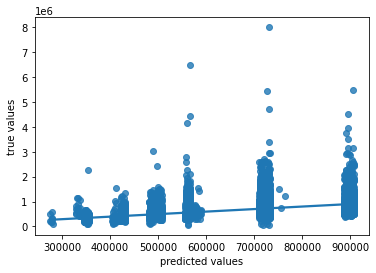

In [53]:
truepredplot(y_train, predict)

Додавання ще одного шару не дало покращення по значенням метрик

Модель дуже цікаво прогнозувала значення, ми бачимо у всіх результатах скупчення у вигляді кластерів <br>
Порівнянно з лінійною регресією значення метрик стало гіршим, створення трьохшарової моделі також не допомогло